<a href="https://colab.research.google.com/github/NMashalov/2023_OpenMipt_course/blob/main/lesson5/%D0%94%D0%97_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 5

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash;  60 баллов





-----

In [1]:
# Bot check

# HW_ID: phds_hw5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import time
from tqdm.notebook import tqdm
from collections import defaultdict

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import torch
from torch import nn
from torch.utils.data import Dataset, TensorDataset, \
                             DataLoader, RandomSampler, SequentialSampler

from IPython.display import clear_output
from pylab import rcParams

rcParams['figure.figsize'] = 15, 7
%matplotlib inline

sns.set(font_scale=1.3, palette='Set2')

#### **Профиль биология**

### Загрузка данных
В этом задании вы будете работать с данными о распространении COVID-19, их можно скачать [здесь](https://www.kaggle.com/datasets/gpreda/coronavirus-2019ncov). Мы будем предказывать показатель смертности, потому что способы измерения выздоровевших и заболевших разнятся между регионами.

 В данных представлены следующие столбцы:

* `Country/Region` &mdash; страна или регион,

* `Province/State` &mdash; город или населенный пункт,
* `Latitude` &mdash; географическая широта,
* `Longitude` &mdash; географическая долгота,
* `Confirmed` &mdash; кол-во подтвержденных случаев заболевания,
* `Recovered` &mdash; кол-во подтвержденных случаев выздоровления,
* `Deaths` &mdash; кол-во смертей,
* `Date` &mdash; дата.

Выгрузите датасет.

In [3]:
!pip install -q opendatasets

In [4]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/gpreda/coronavirus-2019ncov')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mashalovne
Your Kaggle Key: ··········


100%|██████████| 20.5M/20.5M [00:01<00:00, 16.6MB/s]


Установите в качестве индекса дату.

In [5]:
import pandas as pd
df = pd.read_csv('coronavirus-2019ncov/covid-19-all.csv')
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-5-c02a29b90c69>:2: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('coronavirus-2019ncov/covid-19-all.csv')


In [6]:
df.set_index('Date',inplace=True)

In [7]:
df.sample(20)

,Country/Region,Province/State,Latitude,Longitude,Confirmed,Recovered,Deaths
Date,,,,,,,
2020-09-13,Russia,Ulyanovsk Oblast,54.146318,47.232492,13404.0,11400.0,130.0
2021-01-05,NaN,NaN,NaN,NaN,3174.0,0.0,150.0
2020-10-24,US,West Virginia,38.716227,-81.352436,96.0,0.0,2.0
2020-09-06,India,Telangana,18.112400,79.019300,142771.0,110241.0,895.0
2020-10-26,Russia,Kaliningrad Oblast,54.729304,21.148947,6353.0,4282.0,93.0
2021-01-30,NaN,NaN,NaN,NaN,46348.0,0.0,699.0
2020-05-15,US,Indiana,39.767190,-86.510373,1012.0,0.0,57.0
2020-05-14,US,Delaware,39.086466,-75.568849,1115.0,0.0,61.0
2021-01-16,NaN,NaN,NaN,NaN,332.0,0.0,0.0


Избавьтесь от `None`, если они есть.

In [24]:
df.dropna(inplace=True)

Выберите страну и регион, где хотите предсказывать.

In [25]:
df_ukr = df.loc[df['Country/Region']=='Ukraine']

Удалите лишние столбцы в выбранных данных.

In [26]:
df_ukr

,Country/Region,Province/State,Latitude,Longitude,Confirmed,Recovered,Deaths
Date,,,,,,,
2020-06-01,Ukraine,Cherkasy Oblast,49.4444,32.0598,406.0,308.0,16.0
2020-06-01,Ukraine,Chernihiv Oblast,51.4982,31.2893,177.0,63.0,6.0
2020-06-01,Ukraine,Chernivtsi Oblast,48.2917,25.9352,3377.0,945.0,144.0
2020-06-01,Ukraine,Crimea Republic*,45.2835,34.2008,385.0,229.0,3.0
2020-06-01,Ukraine,Dnipropetrovsk Oblast,48.4647,35.0462,942.0,265.0,21.0
...,...,...,...,...,...,...,...
2020-12-31,Ukraine,Vinnytsia Oblast,49.2331,28.4682,22500.0,15237.0,395.0
2020-12-31,Ukraine,Volyn Oblast,50.7472,25.3254,33016.0,28605.0,515.0
2020-12-31,Ukraine,Zakarpattia Oblast,48.6208,22.2879,28200.0,23526.0,637.0


Постройте графики заболевших, выздоровевших и количества смертей.

<Axes: xlabel='Date'>

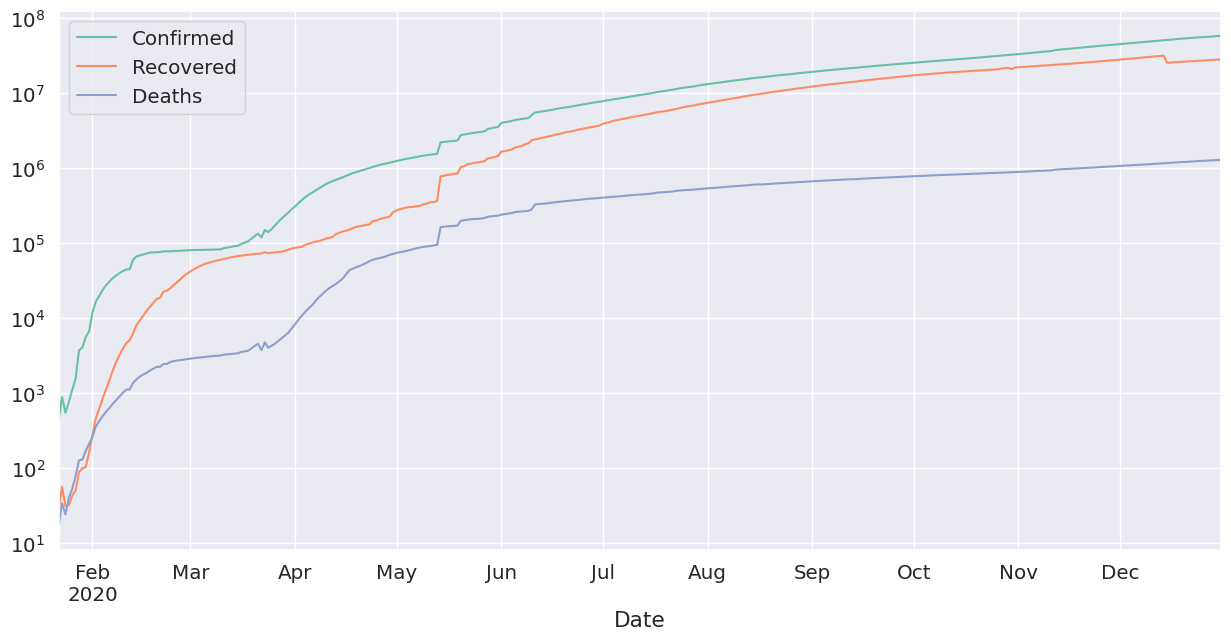

In [45]:
df_temp = df.groupby('Date')[['Confirmed','Recovered','Deaths']].sum()
df_temp.plot(logy=True)

## Модели и обучение

### Вспомогательные функции

Здесь мы создаём функции для обучения, для вывода кривых обучения и для рекурсивного предсказания.

In [46]:
def plot_learning_curves(history):
    '''
    Функция для вывода лосса и метрики во время обучения.

    :param history: (dict)
        accuracy и loss на обучении и валидации.
    '''
    fig = plt.figure(figsize=(10, 5))
    plt.plot(history['loss'])
    plt.ylabel('Лосс')
    plt.xlabel('Эпоха')
    plt.show()


def train_ts_model(
    model,
    criterion,
    optimizer,
    train_batch_gen,
    num_epochs=50,
    device='cuda'
):
    '''
    Функция для обучения модели и вывода лосса во время обучения.

    :param model: обучаемая модель
    :param criterion: функция потерь
    :param optimizer: метод оптимизации
    :param train_batch_gen: генератор батчей для обучения
    :param num_epochs: количество эпох

    :return: обученная модель
    :return: (dict) loss на обучении ('история' обучения)
    '''
    history = defaultdict(list)

    for epoch in range(num_epochs):
        train_loss = 0
        train_acc = 0
        val_loss = 0
        val_acc = 0

        start_time = time.time()

        # Устанавливаем поведение dropout / batch_norm  в обучение
        model.train(True)

        # На каждой 'эпохе' делаем полный проход по данным
        for X_batch, y_batch in train_batch_gen:
            X_batch = X_batch.type('torch.FloatTensor').to(device)
            y_batch = y_batch.type('torch.FloatTensor').to(device)

            logits = model(X_batch)

            loss = criterion(logits.squeeze(), y_batch.squeeze())

            # подсчёт производных
            loss.backward()
            # шаг градиента
            optimizer.step()
            # зануление градиентов
            optimizer.zero_grad()

            train_loss += np.sum(loss.detach().cpu().numpy())

        # Подсчитываем лосс и сохраням в 'историю'
        train_loss /= len(train_batch_gen)
        history['loss'].append(train_loss)

        # clear_output()

        # Печатаем результаты после каждой эпохи
        print('Эпоха {} из {} выполнена за {:.3f} сек.'.format(
            epoch + 1, num_epochs, time.time() - start_time))
        print('  лосс: \t{:.6f}'.format(train_loss))
    plot_learning_curves(history)

    return model, history


def evaluate_ts_model(model, start_seq, prediction_len, device='cpu'):
    '''
    Функция для проверки качества модели на обучающем отрезке ряда.

    :param model: обучаемая модель,
    :param start_seq: обучающие данные для первого предсказания,
    :param test_data: тестовые данные.

    :return: результаты предсказания.
    '''
    result = []
    model.train(False)
    input_tensor = torch.FloatTensor(start_seq).to(device).unsqueeze(0)

    with torch.no_grad():
        for i in range(prediction_len):
            # делаем предсказание, а unsqueeze нужны, чтобы сделать размерность (1, 1, 1) вместо (1)

            logits = model(input_tensor[:, i:, :]).unsqueeze(0)#.unsqueeze(2)

            # присоединяем предсказанное значение к последовательности:
            #                        (1, timestep, 1) -> (1, 1, 1)   по оси 1
            input_tensor = torch.cat((input_tensor,        logits),       1    )

            # обратное преобразование к нормальным числам
            logits = logits.cpu().numpy().squeeze(0)

            # результат сохраняем
            result.append(logits.squeeze())

    return np.array(result)

Создадим класс модели.

In [47]:
class LSTM(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_lstm_layers, use_pool=False):
        super(LSTM, self).__init__()

        self.hidden_size = hidden_size
        self.num_layers  = num_lstm_layers
        self.input_size  = input_size
        self.output_size = output_size

        self.lstm = nn.LSTM(
            input_size = self.input_size,
            hidden_size = self.hidden_size,
            num_layers = self.num_layers,
            batch_first=True,
            dropout=0.2,
        ) # LSTM-модель с batch_first=True и dropout=0.2

        # Размерность пространства выхода последнего LSTM-слоя равна hidden_size.
        # Линейный слой нужен, чтобы преобразовать выход LSTM к нужному размеру output_size.
        self.fc = nn.Linear(self.hidden_size,self.output_size) # добавьте линейный слой

        # Пуллинг
        self.pool = nn.AdaptiveAvgPool1d(1) # добавьте усредняющий все выходы пуллинг-слой
        self.use_pool = use_pool


    def forward(self, input_seq):

        # инициализируем начальные скрытые состояния
        h_0 = torch.zeros(self.num_layers, input_seq.size(0), self.hidden_size).to(device=input_seq.device)
        c_0 = torch.zeros(self.num_layers, input_seq.size(0), self.hidden_size).to(device=input_seq.device)

        out, (_, _) = self.lstm(input_seq, (h_0, c_0))

        if self.use_pool:
            # берем среднее от векторов для всей последовательности
            out_to_fc = self.pool(out.transpose(1, 2)).squeeze(-1)
        else:
            # берем последний выходной вектор
            out_to_fc = out[:, -1, :]

        return self.fc(out_to_fc)

Напишем функцию для визуализации результатов предсказания.

In [48]:
def plot_results(y_to_train, y_to_test=None, y_forecast=None):
    """
        Функция для визуализации временного ряда и предсказания.

        Параметры:
            - y_to_train: pd.Series
                Временной ряд, на котором обучалась модель.
            - y_to_test: pd.Series
                Временной ряд, который предсказывает модель.
            - y_forecast: array
                Предсказания модели.
            - plot_conf_int: bool
                Надо ли строить предсказательного интервал.
            - left_bound: array
                Левая граница предсказательного интервала.
            - right_bound: array
                Правая граница предсказательного интервала.
    """
    plt.figure(figsize=(15, 5))
    plt.plot(np.arange(len(y_to_train)), y_to_train, label='train')

    if y_to_test is not None:
        plt.plot(np.arange(len(y_to_train), len(y_to_train) + len(y_to_test)), y_to_test,  label='test')
        if y_forecast is not None:
            plt.plot(np.arange(len(y_to_train), len(y_to_train) + len(y_to_test)), y_forecast, label='prediction')
    plt.legend()
    plt.show()

#### **Профиль биология**


Разделим выборку на тест и трейн.

In [49]:
# normalization
df_temp = df_temp / 1e8

In [50]:
test_time = pd.Timestamp('2020-12-01')
train_bio = df_temp.loc[df_temp.index < test_time]
test_bio =  df_temp.loc[df_temp.index > test_time]

Посмотрим на то, что получилось.

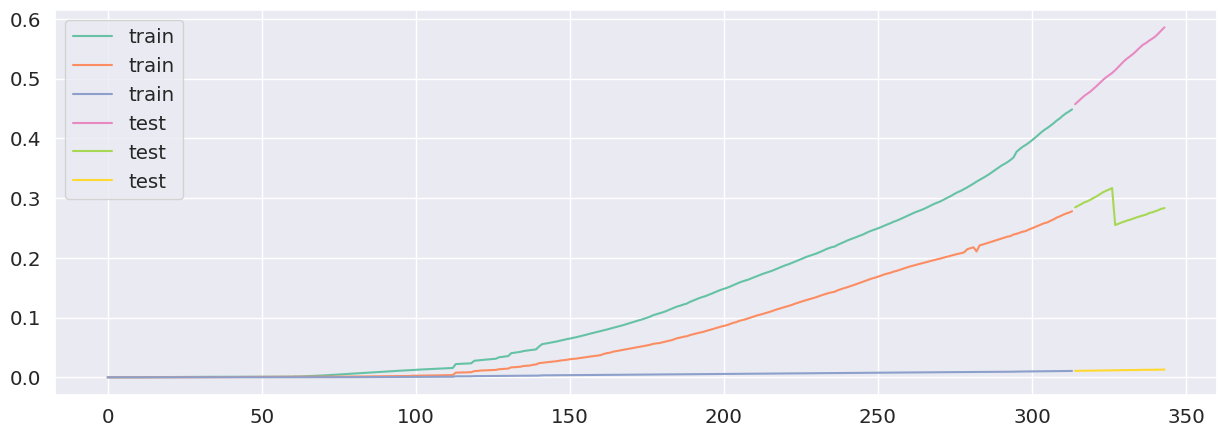

In [51]:
plot_results(train_bio, test_bio)

Зададим длину подпоследовательности, размер батча, девайс.

In [69]:
timesteps = 20
batch_size = 16

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Преобразуйте к датасету с помощью нашего класса и сделайте генератор батчей.

In [70]:
class TSDataset(torch.utils.data.Dataset):
    def __init__(self, data, timesteps):
        self.data = data.copy()
        self.timesteps = timesteps
        self.target_columns = self.data.columns
        # self.data['month'] = self.data.index.month
        # self.data['year'] = self.data.index.year

    def __len__(self):
        return len(self.data)-self.timesteps # количество подпоследовательностей заданной длины

    def __getitem__(self, index):
        return (self.data.iloc[index:index+self.timesteps].values, self.data.iloc[index+self.timesteps][self.target_columns].values) # верните X и y

In [71]:
train_data = TSDataset(train_bio,timesteps)
test_data = TSDataset(test_bio,timesteps=1)

In [72]:
print(*map(lambda x: x.shape,train_data[0]))

(20, 3) (3,)


Инициализируйте модель.

In [73]:
model = LSTM(
    3,
    3,
    hidden_size=8,
    num_lstm_layers=1,
    use_pool=True)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Обучите её.

Эпоха 1 из 250 выполнена за 0.249 сек.
  лосс: 	0.072557
Эпоха 2 из 250 выполнена за 0.239 сек.
  лосс: 	0.047650
Эпоха 3 из 250 выполнена за 0.235 сек.
  лосс: 	0.031082
Эпоха 4 из 250 выполнена за 0.236 сек.
  лосс: 	0.019457
Эпоха 5 из 250 выполнена за 0.243 сек.
  лосс: 	0.013054
Эпоха 6 из 250 выполнена за 0.226 сек.
  лосс: 	0.010815
Эпоха 7 из 250 выполнена за 0.228 сек.
  лосс: 	0.009826
Эпоха 8 из 250 выполнена за 0.249 сек.
  лосс: 	0.008849
Эпоха 9 из 250 выполнена за 0.253 сек.
  лосс: 	0.008032
Эпоха 10 из 250 выполнена за 0.208 сек.
  лосс: 	0.007392
Эпоха 11 из 250 выполнена за 0.164 сек.
  лосс: 	0.006835
Эпоха 12 из 250 выполнена за 0.167 сек.
  лосс: 	0.006310
Эпоха 13 из 250 выполнена за 0.152 сек.
  лосс: 	0.005803
Эпоха 14 из 250 выполнена за 0.162 сек.
  лосс: 	0.005310
Эпоха 15 из 250 выполнена за 0.164 сек.
  лосс: 	0.004829
Эпоха 16 из 250 выполнена за 0.175 сек.
  лосс: 	0.004356
Эпоха 17 из 250 выполнена за 0.166 сек.
  лосс: 	0.003892
Эпоха 18 из 250 выполне

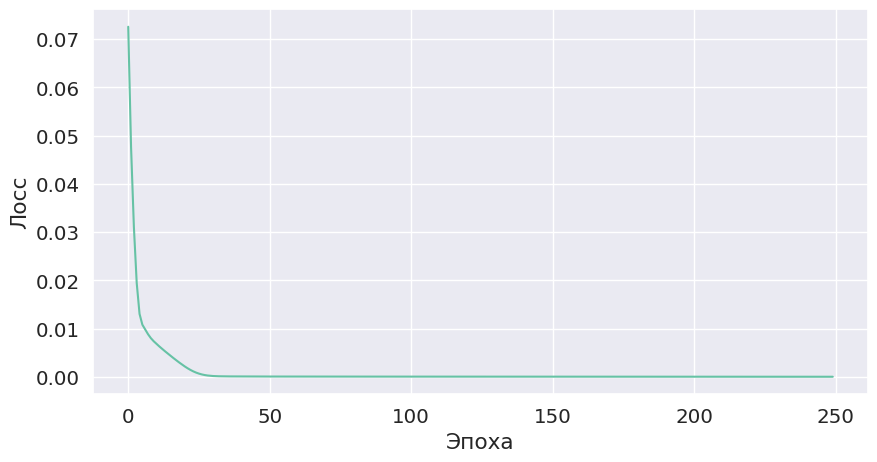

In [74]:
from torch.utils.data import DataLoader
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=1e-3)
train_batch_gen = DataLoader(train_data,batch_size=batch_size)


model,_ = train_ts_model(
    model,
    criterion,
    optimizer,
    train_batch_gen,
    num_epochs=250,
    device=device
)

Создадим предсказания на тесте.

In [76]:
prediction = evaluate_ts_model(model, train_data.data.iloc[-timesteps:].values,len(test_data)+1,device=device)

prediction

array([[0.44679698, 0.27752408, 0.00862867],
       [0.45118085, 0.27958712, 0.00868144],
       [0.4552233 , 0.28143886, 0.00871021],
       [0.4591982 , 0.283245  , 0.00873437],
       [0.46313652, 0.28502694, 0.00875535],
       [0.46709976, 0.28682098, 0.00877471],
       [0.47103205, 0.28859007, 0.00879411],
       [0.47492537, 0.29033008, 0.00881156],
       [0.47876993, 0.29203418, 0.00882777],
       [0.4825512 , 0.29369432, 0.00884213],
       [0.48626313, 0.29530823, 0.00885477],
       [0.4899417 , 0.29689667, 0.00886806],
       [0.4936374 , 0.29848582, 0.00888181],
       [0.49729916, 0.3000394 , 0.00889715],
       [0.50091684, 0.30154788, 0.00891175],
       [0.5044528 , 0.30298623, 0.00892625],
       [0.5079719 , 0.30439135, 0.00894038],
       [0.51140547, 0.30572638, 0.00895263],
       [0.5147927 , 0.3070216 , 0.0089647 ],
       [0.5181843 , 0.30831656, 0.00897903],
       [0.52155864, 0.30961105, 0.00899977],
       [0.52536166, 0.3111484 , 0.00904009],
       [0.

Сравним предсказание с реальностью.

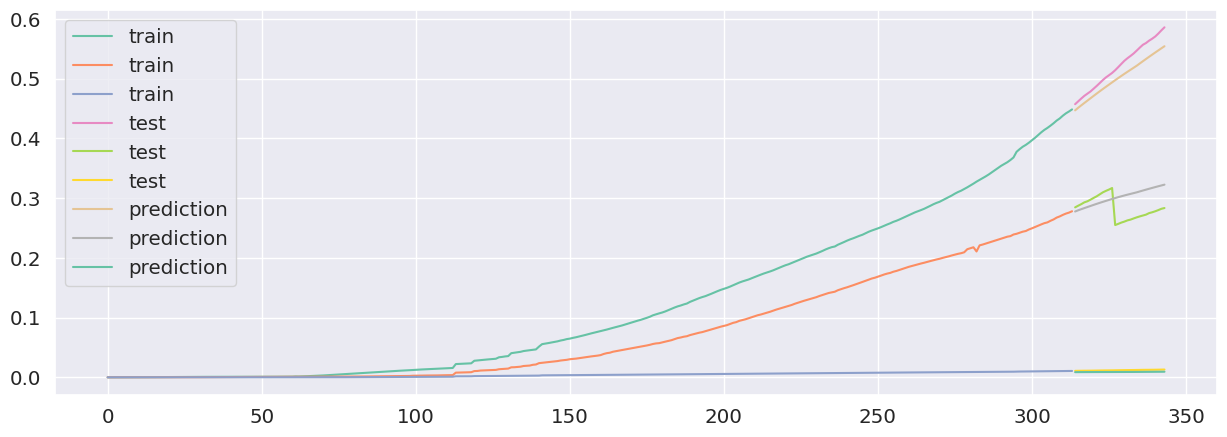

In [77]:
plot_results(train_bio, test_bio,prediction)

Влияние горизонта планирования на качество предсказания

In [90]:
def check_timestamp_hyperparam(timesteps):
    train_data = TSDataset(train_bio,timesteps)
    test_data = TSDataset(test_bio,timesteps=1)

    model = LSTM(
        3,
        3,
        hidden_size=8,
        num_lstm_layers=1,
        use_pool=True)

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(),lr=1e-3)
    train_batch_gen = DataLoader(train_data,batch_size=batch_size)

    model,_ = train_ts_model(
        model,
        criterion,
        optimizer,
        train_batch_gen,
        num_epochs=250,
        device=device
    )

    prediction = evaluate_ts_model(model, train_data.data.iloc[-timesteps:].values,len(test_data)+1,device=device)
    plot_results(train_bio, test_bio,prediction)

Эпоха 1 из 250 выполнена за 0.160 сек.
  лосс: 	0.005058
Эпоха 2 из 250 выполнена за 0.152 сек.
  лосс: 	0.017087
Эпоха 3 из 250 выполнена за 0.165 сек.
  лосс: 	0.006947
Эпоха 4 из 250 выполнена за 0.167 сек.
  лосс: 	0.004912
Эпоха 5 из 250 выполнена за 0.151 сек.
  лосс: 	0.001746
Эпоха 6 из 250 выполнена за 0.159 сек.
  лосс: 	0.000924
Эпоха 7 из 250 выполнена за 0.162 сек.
  лосс: 	0.000891
Эпоха 8 из 250 выполнена за 0.165 сек.
  лосс: 	0.000226
Эпоха 9 из 250 выполнена за 0.152 сек.
  лосс: 	0.000503
Эпоха 10 из 250 выполнена за 0.158 сек.
  лосс: 	0.000281
Эпоха 11 из 250 выполнена за 0.155 сек.
  лосс: 	0.000206
Эпоха 12 из 250 выполнена за 0.147 сек.
  лосс: 	0.000301
Эпоха 13 из 250 выполнена за 0.169 сек.
  лосс: 	0.000095
Эпоха 14 из 250 выполнена за 0.160 сек.
  лосс: 	0.000368
Эпоха 15 из 250 выполнена за 0.151 сек.
  лосс: 	0.000087
Эпоха 16 из 250 выполнена за 0.147 сек.
  лосс: 	0.000330
Эпоха 17 из 250 выполнена за 0.164 сек.
  лосс: 	0.000086
Эпоха 18 из 250 выполне

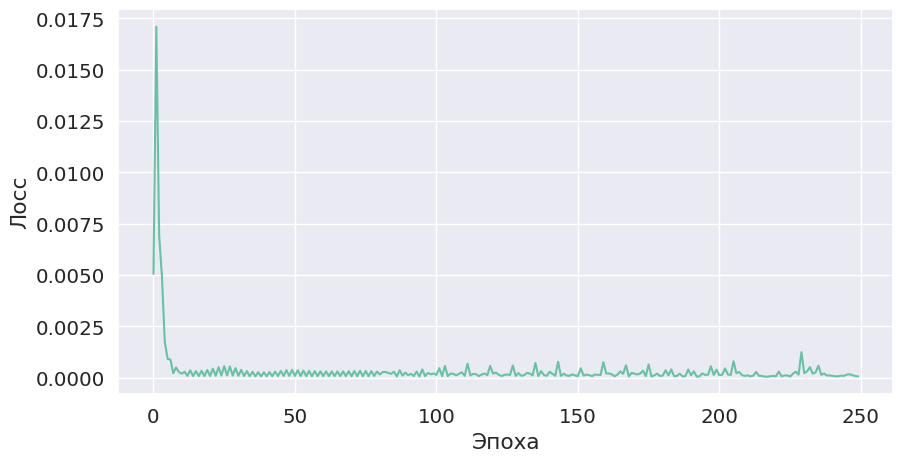

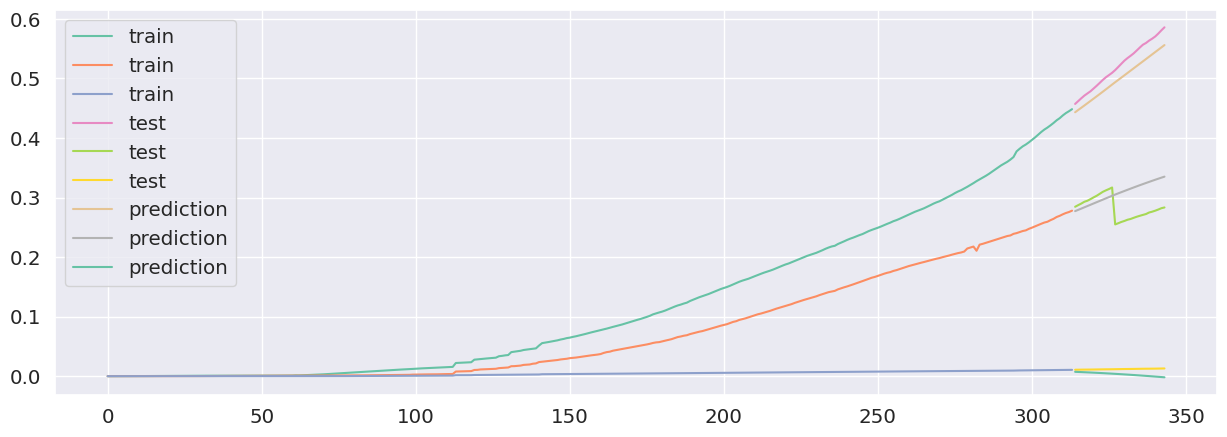

In [91]:
check_timestamp_hyperparam(32)

**Вывод**

LSTM отлично подходит для анализа временных рядов. Важным гиперпараметром в задаче служит горизонт прогнозирования `timesteps`.

Модель требует долгого обучения без явного изменения loss-а для получения правдоподобных результатов на валидации. В общем случае модель недоценивает кривизну кривой
